In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Variables
data_path = os.path.join('..','data')
img_path = os.path.join('..','static','images')

In [3]:
#Pull in csv
mbti = pd.read_csv(os.path.join(data_path,'mbti_phase1.csv'))

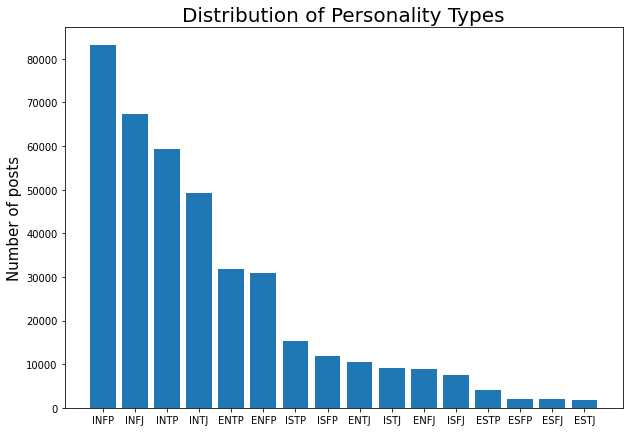

In [4]:
mb = mbti.groupby('type').agg({'type':'count'}).rename(columns={'type':'count'}).sort_values('count',ascending=False)
plt.figure(figsize=(10,7))
plt.title("Distribution of Personality Types", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.bar(mb.index, mb['count'])
plt.savefig(os.path.join(img_path,"type_hist.png"))
plt.show()

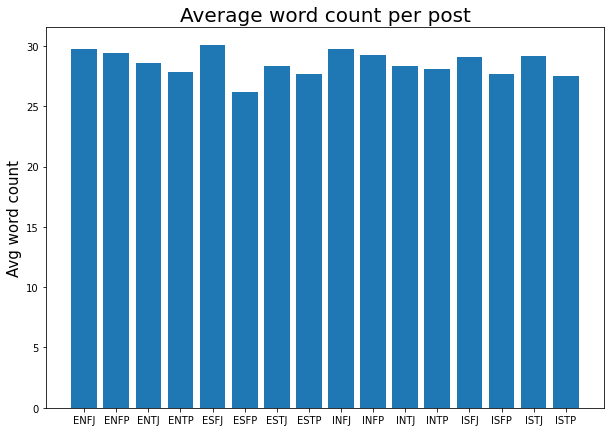

In [5]:
avg_words_type = mbti.groupby('type').agg({'word_count':'mean'})
plt.figure(figsize=(10,7))
plt.title("Average word count per post", fontsize=20)
plt.ylabel("Avg word count", fontsize=15)
plt.bar(avg_words_type.index,avg_words_type['word_count'])
plt.savefig(os.path.join(img_path,"avg_words.png"))
plt.show()

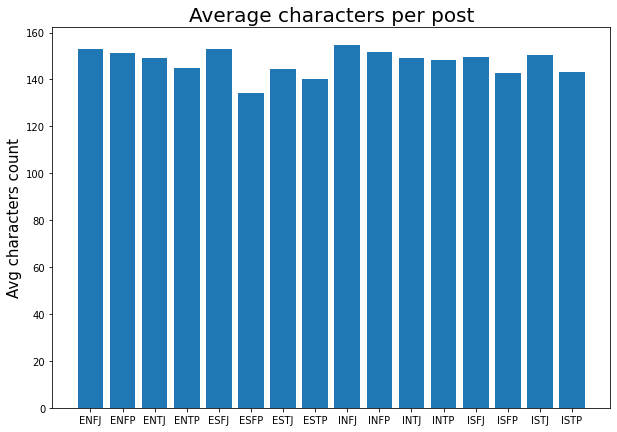

In [6]:
avg_char_type = mbti.groupby('type').agg({'char_count':'mean'})
plt.figure(figsize=(10,7))
plt.title("Average characters per post", fontsize=20)
plt.ylabel("Avg characters count", fontsize=15)
plt.bar(avg_char_type.index,avg_char_type['char_count'])
plt.savefig(os.path.join(img_path,"avg_char.png"))
plt.show()

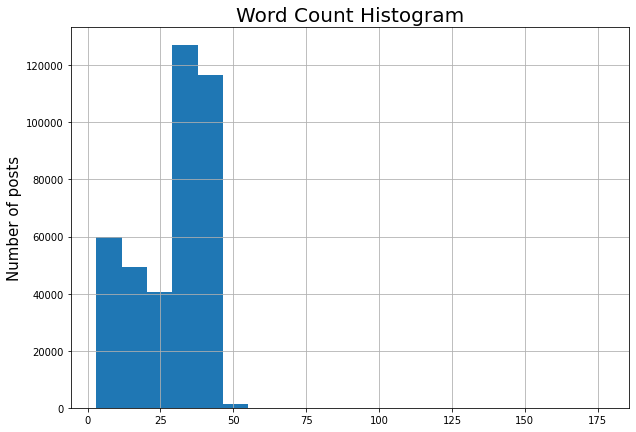

In [7]:
plt.figure(figsize=(10,7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
mbti['word_count'].hist(bins=20)
plt.savefig(os.path.join(img_path,"word_hist.png"))
plt.show()

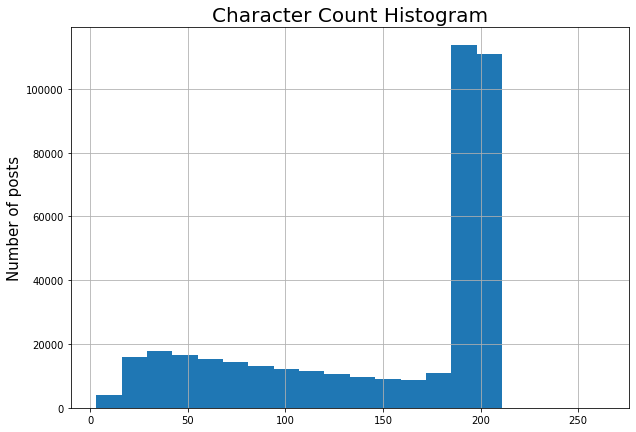

In [8]:
plt.figure(figsize=(10,7))
plt.title("Character Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
mbti['char_count'].hist(bins=20)
plt.savefig(os.path.join(img_path,"character_hist.png"))
plt.show()

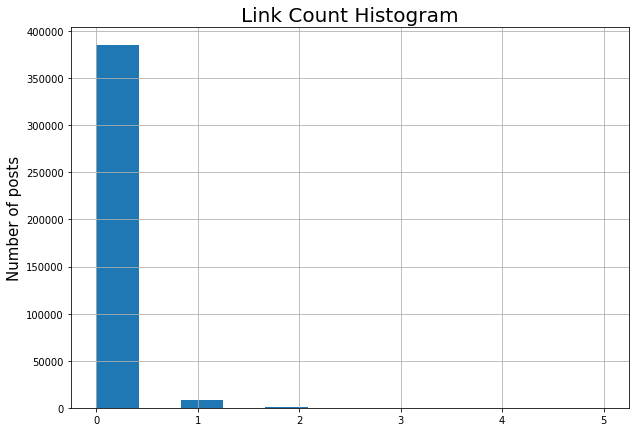

In [9]:
plt.figure(figsize=(10,7))
plt.title("Link Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
mbti['link_count'].hist(bins=12)
plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

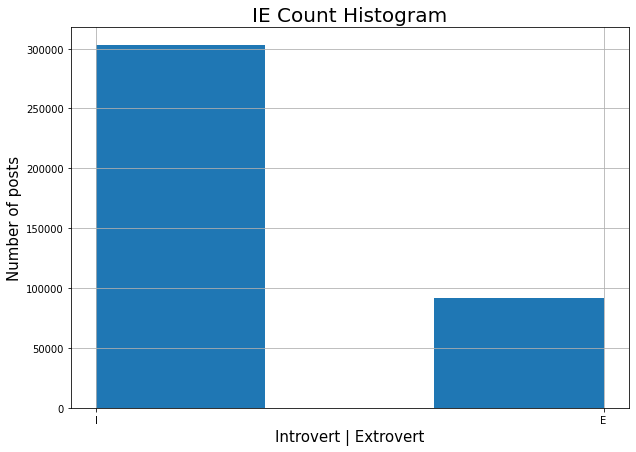

In [10]:
plt.figure(figsize=(10,7))
plt.title("IE Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Introvert | Extrovert", fontsize=15)
mbti['is_extrovert'].replace(0,'I').replace(1,'E').hist(bins=3)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

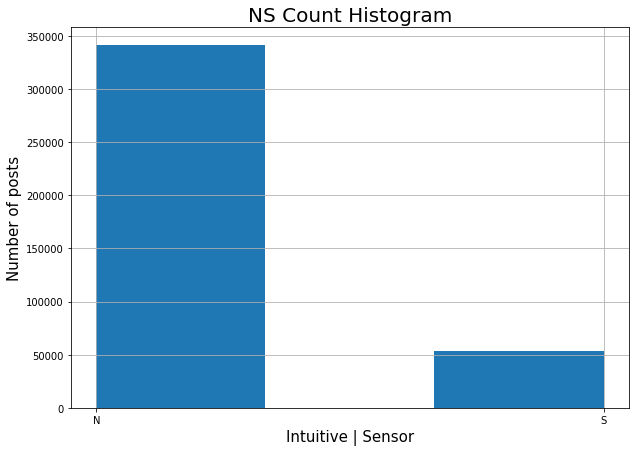

In [11]:
plt.figure(figsize=(10,7))
plt.title("NS Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Intuitive | Sensor", fontsize=15)
mbti['is_sensor'].replace(0,'N').replace(1,'S').hist(bins=3)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

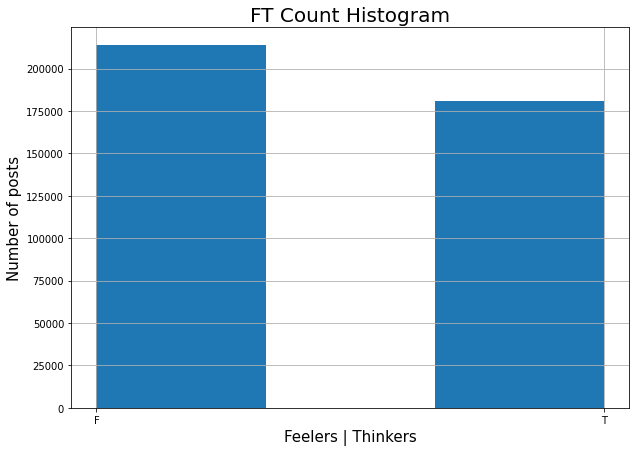

In [12]:
plt.figure(figsize=(10,7))
plt.title("FT Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Feelers | Thinkers", fontsize=15)
mbti['is_thinker'].replace(0,'F').replace(1,'T').hist(bins=3)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

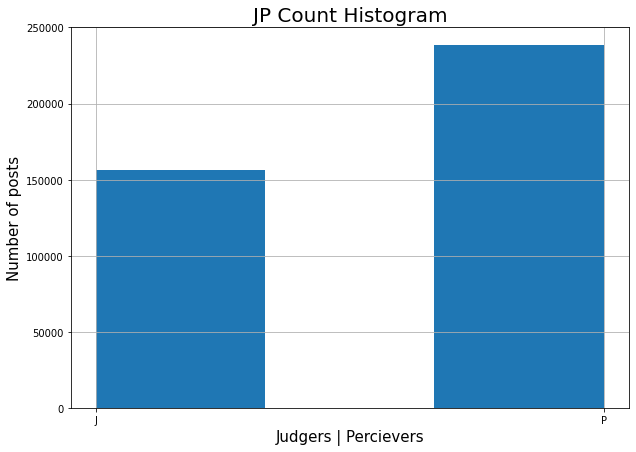

In [13]:
plt.figure(figsize=(10,7))
plt.title("JP Count Histogram",fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Judgers | Percievers", fontsize=15)
mbti['is_judger'].replace(0,'P').replace(1,'J').hist(bins=3)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

#### Word Clouds

NameError: name 'WordCloud' is not defined

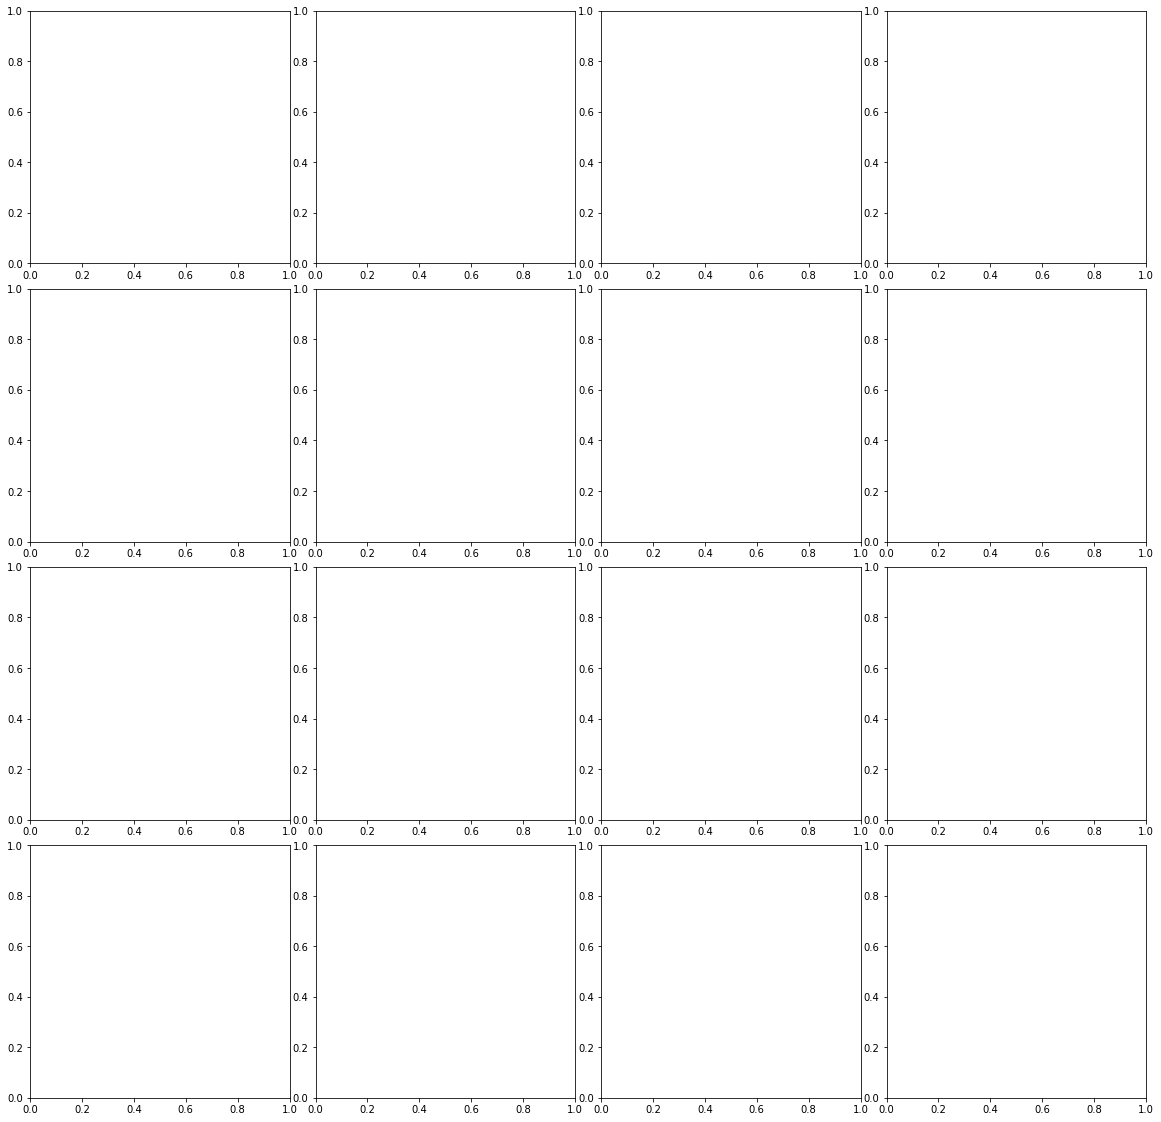

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace = .1, wspace=.1)
ax = ax.ravel()

for i, mbti_type in enumerate(mbti["type"].unique()):
        wordcloud_words = " ".join(mbti[mbti["type"]==mbti_type]["clean_post"])
        wordcloud = WordCloud(height=500).generate(wordcloud_words)
        ax[i].imshow(wordcloud, interpolation = 'bilinear')
        ax[i].axis("off")
        ax[i].set_title(mbti_type)

#### Word Count by Type

In [ ]:
# boxplot of word counts
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="word_count", data=mbti, showfliers=False)